In [1]:
import torch
import math

##simulation
print('& LATE & MLATE\\\\')
print('Method & $\\alpha_0$ & $\\alpha_1$ & $\\alpha_0$ & $\\alpha_1$\\\\')
for method in ['mle', 'dru', 'drw']:
    for mis in ['bth', 'opc', 'psc', 'bad']:
        print('{}.{}&'.format(method, mis), end='')
        for estimator in ['LATE', 'MLATE']:
            result = torch.load('{}_{}_{}.pt'.format(method, mis, estimator))
            bias = torch.abs(result.mean(0) - torch.tensor([0.0,-1.0])) * 100
            std = torch.sqrt(torch.mean((result - torch.tensor([0.0,-1.0]))**2, 0)) / math.sqrt(result.shape[0]) * 100
            print('{:.02f} ({:.02f}) & '.format(bias[0].item(), std[0].item()), end='')
            print('{:.02f} ({:.02f})'.format(bias[1].item(), std[1].item()), end='')
            if estimator == 'LATE':
                print('&',end='')
        print('\\\\')

& LATE & MLATE\\
Method & $\alpha_0$ & $\alpha_1$ & $\alpha_0$ & $\alpha_1$\\
mle.bth&4.55 (0.44) & 9.31 (0.93)&13.81 (0.81) & 18.33 (1.32)\\
mle.opc&5.86 (0.48) & 11.94 (0.95)&16.47 (0.85) & 21.11 (1.35)\\
mle.psc&5.86 (0.48) & 11.94 (0.95)&16.47 (0.85) & 21.11 (1.35)\\
mle.bad&19.15 (0.69) & 2.80 (0.62)&41.28 (1.46) & 0.53 (1.05)\\
dru.bth&0.95 (0.45) & 6.16 (1.04)&3.58 (1.00) & 9.75 (1.79)\\
dru.opc&1.21 (0.43) & 4.55 (0.97)&0.02 (1.05) & 10.78 (1.99)\\
dru.psc&1.21 (0.43) & 4.55 (0.97)&0.02 (1.05) & 10.78 (1.99)\\
dru.bad&15.25 (0.70) & 29.99 (1.80)&25.23 (1.43) & 17.30 (2.56)\\
drw.bth&0.29 (1.04) & 1.55 (1.20)&3.04 (1.24) & 4.75 (1.77)\\
drw.opc&3.71 (1.27) & 0.63 (1.45)&0.30 (1.10) & 6.39 (1.78)\\
drw.psc&3.71 (1.27) & 0.63 (1.45)&0.30 (1.10) & 6.39 (1.78)\\
drw.bad&10.97 (0.56) & 13.68 (1.19)&29.54 (1.65) & 4.18 (2.59)\\


In [2]:
## real_data
from scipy.stats import norm
real_mlealphas = torch.load('real_mlealphas.pt')
real_drwalphas = torch.load('real_drwalphas.pt')
mle_mean = torch.mean(real_mlealphas, dim=0)
drw_mean = torch.mean(real_drwalphas, dim=0)
mle_std = torch.std(real_mlealphas, dim=0)
drw_std = torch.std(real_drwalphas, dim=0)

mle_LB = mle_mean + norm.ppf(0.025) * mle_std / math.sqrt(real_mlealphas.shape[0])
mle_UB = mle_mean + norm.ppf(0.975) * mle_std / math.sqrt(real_mlealphas.shape[0])
drw_LB = drw_mean + norm.ppf(0.025) * drw_std / math.sqrt(real_drwalphas.shape[0])
drw_UB = drw_mean + norm.ppf(0.975) * drw_std / math.sqrt(real_drwalphas.shape[0])

LB = torch.stack((mle_LB, drw_LB), dim=0)
UB = torch.stack((mle_UB, drw_UB), dim=0)

/var/folders/0g/zs2cqb497_d8fxff8rh3qghm0000gn/T/ipykernel_40596/2822529581.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  plt.plot((lower,upper),(y,y),'ro-',color='blue')


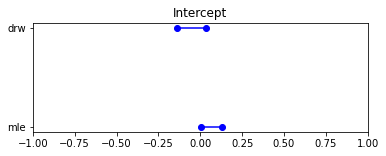

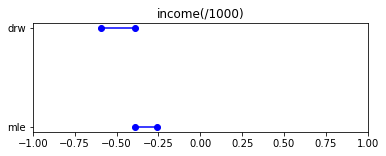

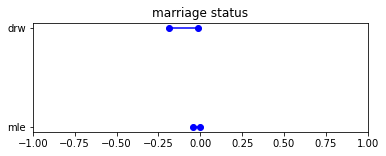

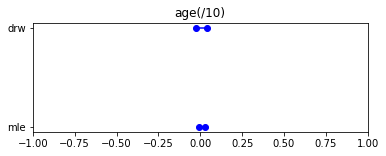

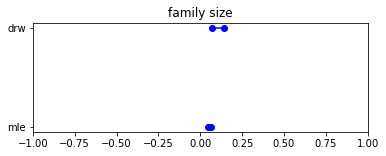

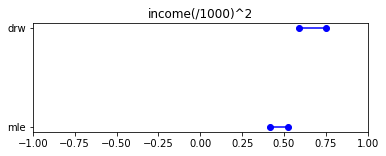

In [7]:
import matplotlib.pyplot as plt
titles = ['Intercept', 'income(/1000)', 'marriage status', 'age(/10)', 'family size', 'income(/1000)^2']
for i in range(LB.shape[1]):
    plt.figure(figsize=(6,2))
    for lower, upper, y in zip(LB[:,i].tolist(), UB[:,i].tolist(), [0,1]):
        plt.plot((lower,upper),(y,y),'ro-',color='blue')
    plt.yticks([0,1], ['mle', 'drw'])
    plt.xlim((-1,1))
    plt.title(titles[i])
    plt.savefig(str(i)+'.eps')
    plt.show()

In [14]:
drw_UB,drw_LB

(tensor([ 0.0335, -0.3901, -0.0147,  0.0430,  0.1391,  0.7530]),
 tensor([-0.1389, -0.5943, -0.1874, -0.0226,  0.0699,  0.5929]))